In [1]:
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay, classification_report

df=pd.read_csv('C:/Users/asnav/Desktop/MachineLearning/datasets/iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
x=df.iloc[:,1:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y=df.iloc[:,-1:].values
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [11]:
x_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [12]:
y_train

array([['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       

In [13]:
y_test

array([['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'

In [14]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-1.02366372, -2.37846268, -0.18295039, -0.29145882],
       [ 0.69517462, -0.10190314,  0.93066067,  0.73721938],
       [ 0.92435306,  0.58106472,  1.04202177,  1.6373128 ],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35146505],
       [ 0.92435306, -1.24018291,  1.09770233,  0.73721938],
       [-0.33612839, -1.24018291,  0.03977182, -0.16287405],
       [ 2.07024529, -0.10190314,  1.26474398,  1.38014325],
       [ 0.46599617,  0.58106472,  0.48521625,  0.48004983],
       [-0.45071761, -1.46783886, -0.01590873, -0.16287405],
       [ 0.46599617, -0.784871  ,  0.59657735,  0.73721938],
       [ 0.46599617, -0.55721505,  0.70793846,  0.35146505],
       [-1.13825295, -1.24018291,  0.37385514,  0.6086346 ],
       [ 0.46599617, -1.24018291,  0.6522579 ,  0.86580415],
       [ 1.26812073,  0.35340877,  0.48521625,  0.22288028],
       [ 0.69517462, -0.10190314,  0.76361901,  0.99438893],
       [ 0.1222285 ,  0.80872067,  0.37385514,  0.48004983],
       [-1.25284217,  0.

In [15]:
x_test

array([[-0.10694994, -0.55721505,  0.70793846,  1.50872803],
       [ 0.1222285 , -1.92315077,  0.09545238, -0.29145882],
       [-0.45071761,  2.6299683 , -1.35224199, -1.32013702],
       [ 1.6118884 , -0.32955909,  1.37610509,  0.73721938],
       [-1.02366372,  0.80872067, -1.29656144, -1.32013702],
       [ 0.46599617,  0.58106472,  1.20906343,  1.6373128 ],
       [-1.02366372,  1.03637663, -1.40792255, -1.19155225],
       [ 0.92435306,  0.12575281,  0.48521625,  0.35146505],
       [ 1.03894229, -0.55721505,  0.5408968 ,  0.22288028],
       [ 0.23681773, -0.55721505,  0.09545238,  0.0942955 ],
       [ 0.23681773, -1.01252695,  0.98634122,  0.22288028],
       [ 0.5805854 ,  0.35340877,  0.37385514,  0.35146505],
       [ 0.23681773, -0.55721505,  0.48521625, -0.03428927],
       [ 0.69517462, -0.55721505,  0.42953569,  0.35146505],
       [ 0.23681773, -0.32955909,  0.48521625,  0.22288028],
       [-1.13825295,  0.12575281, -1.29656144, -1.4487218 ],
       [ 0.1222285 , -0.

In [16]:
model=GaussianNB()
model.fit(x_train,y_train)


c:\Users\asnav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [17]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [18]:
y_test

array([['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'

In [19]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

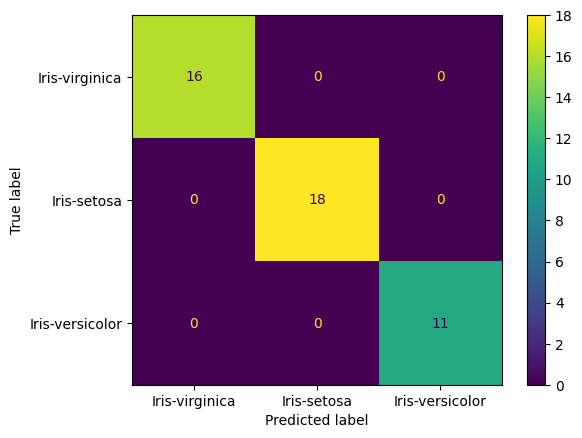

In [20]:
labels=['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [21]:
score=accuracy_score(y_test,y_pred)
score

1.0

In [22]:
cr=classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

